# $L_p = L_w + 10 \lg (Q/4\pi r^2 + 4/R_c)$
where $R_c$ is the room constant, $R_c=S / (1-\alpha) $ and $R_c \approx A$  for $ \bar{\alpha} <<1 $ . Room radius 
$r = \sqrt(R_c Q / 16\pi)$ . Room radius is also called the critical distance, at which the direct field level equals the reverberant-field level. For rooms with little absorbing materials the above can be written as:
# $L_p = L_w + 10 \lg [4 / (S\bar{\alpha})]$

In [65]:
import numpy as np

def Lw_to_Lp(Lw, S, a):
    return Lw + 10*np.log10(4/(S*a))

Lw, S, a = 100, 200, 0.1
Lw_to_Lp(Lw, S, a)

93.01029995663981

# $R = L_1 - L_2 + 10 \lg S/A$
where, $R$ is the sound insulaiton index, $L_1$ is the noise level in source room, $L_2$ is the noise level in receiving room, $S$ is the area of the insulating sample, $A$ is the sabine area, calculated by $A=S* \bar{\alpha}$. It is assumed that $R' = R $

In [15]:
import numpy as np

class L1L2R:
    def __init__(self):
        self.S = 20 # m2 
        self.T = 0.8 # s
        self.V = 80 # m^3
        self.A = 0.161*V/T # m2
        self.flanking = 5 # dB
        
        self.L1 = np.array([100.0, 100, 100, 100, 100]) # dB
        self.L2 = np.array([40, 40, 40, 40, 40]) # dB
        self.R = np.array([50, 50, 50, 50, 50]) # dB

    def L1_L2_to_R(self):
        return self.L1 - self.L2 + 10*np.log10(self.S/self.A) + self.flanking

    def L1_R_to_L2(self):
        return self.L1 - self.R + 10*np.log10(self.S/self.A) + self.flanking
obj = L1L2R()

# obj.L1_L2_to_R()
# obj.L1_R_to_L2()

# $R'_w=D_{nT,w} - 10\lg (T/T0) + 10 \lg (S/A)$
Due to the relation $1/A = T/(0.16V)$, T is cancelled out and the above equation can be rewritten as: 
# $R'_w=D_{nT,w} - 10\lg (1/T0) + 10 \lg [S/(0.16V)]$

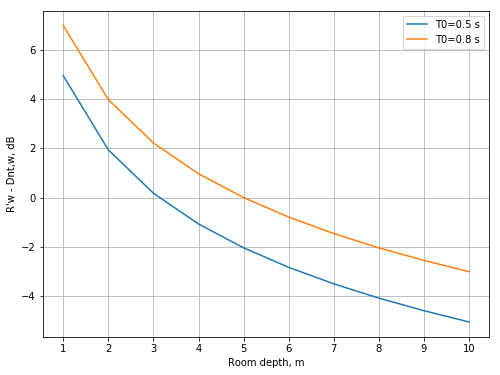

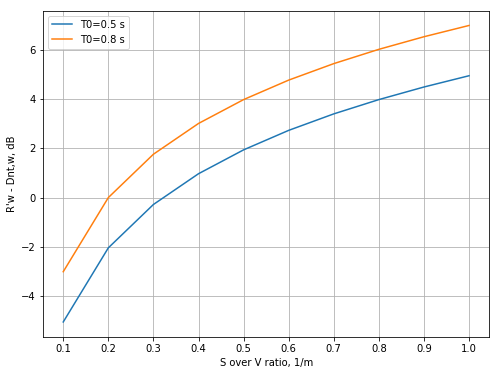

47.95880017344075

In [72]:
import numpy as np
import matplotlib.pylab as plt

# partition completely seperate two regular space
T0s = [0.5, 0.8]
d = np.linspace(1, 10, 10)
plt.figure(figsize=[8,6])
for T0 in T0s:
    Rdashw_Dntw = -10*np.log10(1/T0) + 10*np.log10(1/(0.16*d))
    plt.plot(d, Rdashw_Dntw, label="T0="+str(T0)+" s")
plt.xlabel("Room depth, m")
plt.ylabel("R'w - Dnt,w, dB")
plt.xticks(d)
plt.legend()
plt.grid(True)

# irregular space
plt.figure(figsize=[8,6])
SoverV = np.linspace(1, 0.1, 10)
for T0 in T0s:
    Rdashw_Dntw = -10*np.log10(1/T0) + 10*np.log10(SoverV/0.16)
    plt.plot(SoverV, Rdashw_Dntw, label="T0="+str(T0)+" s")
plt.xlabel("S over V ratio, 1/m")
plt.ylabel("R'w - Dnt,w, dB")
plt.xticks(SoverV)
plt.legend()
plt.grid(True)   
plt.show()

# caculate R'w 
S, V, T0, Dntw = 10, 50, 0.5, 50
Rdashw = Dntw -10*np.log10(1/T0) + 10*np.log10(S/(0.16*V))
Rdashw